*Created by Petteri Nevavuori.*

---

# Deep Learning seminaari

Kirjana Goodfellow et al.: Deep Learning (2016)

Otsikot seuraavat pääotsikoiden tasolla kirjaa, mutta alaotsikot eivät aina.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#16.-Structured-Probabilistic-Models-for-Deep-Learning" data-toc-modified-id="16.-Structured-Probabilistic-Models-for-Deep-Learning-1">16. Structured Probabilistic Models for Deep Learning</a></span><ul class="toc-item"><li><span><a href="#16.1-The-Challenge-of-Unstructured-Modeling" data-toc-modified-id="16.1-The-Challenge-of-Unstructured-Modeling-1.1">16.1 The Challenge of Unstructured Modeling</a></span></li><li><span><a href="#16.2-Using-Graphs-to-Describe-Model-Structure" data-toc-modified-id="16.2-Using-Graphs-to-Describe-Model-Structure-1.2">16.2 Using Graphs to Describe Model Structure</a></span><ul class="toc-item"><li><span><a href="#Directed-Models" data-toc-modified-id="Directed-Models-1.2.1">Directed Models</a></span></li><li><span><a href="#Undirected-Models" data-toc-modified-id="Undirected-Models-1.2.2">Undirected Models</a></span></li><li><span><a href="#The-Partition-Function" data-toc-modified-id="The-Partition-Function-1.2.3">The Partition Function</a></span></li><li><span><a href="#Energy-Based-Models" data-toc-modified-id="Energy-Based-Models-1.2.4">Energy-Based Models</a></span></li><li><span><a href="#Separation-and-D-Separation" data-toc-modified-id="Separation-and-D-Separation-1.2.5">Separation and D-Separation</a></span></li><li><span><a href="#Converting-between-Undirected-and-Directed-Graphs" data-toc-modified-id="Converting-between-Undirected-and-Directed-Graphs-1.2.6">Converting between Undirected and Directed Graphs</a></span></li><li><span><a href="#Factor-Graphs" data-toc-modified-id="Factor-Graphs-1.2.7">Factor Graphs</a></span></li></ul></li><li><span><a href="#16.3-Sampling-from-Graphical-Models" data-toc-modified-id="16.3-Sampling-from-Graphical-Models-1.3">16.3 Sampling from Graphical Models</a></span></li><li><span><a href="#16.4-Advantages-of-Structured-Modeling" data-toc-modified-id="16.4-Advantages-of-Structured-Modeling-1.4">16.4 Advantages of Structured Modeling</a></span></li><li><span><a href="#16.5-Learning-about-Dependencies" data-toc-modified-id="16.5-Learning-about-Dependencies-1.5">16.5 Learning about Dependencies</a></span></li><li><span><a href="#16.6-Inference-and-Approximate-Inference" data-toc-modified-id="16.6-Inference-and-Approximate-Inference-1.6">16.6 Inference and Approximate Inference</a></span></li><li><span><a href="#16.7-The-Deep-Learning-Approach-to-Structured-Probabilistic-Models" data-toc-modified-id="16.7-The-Deep-Learning-Approach-to-Structured-Probabilistic-Models-1.7">16.7 The Deep Learning Approach to Structured Probabilistic Models</a></span><ul class="toc-item"><li><span><a href="#Example:-The-Restricted-Boltzmann-Machine" data-toc-modified-id="Example:-The-Restricted-Boltzmann-Machine-1.7.1">Example: The Restricted Boltzmann Machine</a></span></li></ul></li></ul></li></ul></div>

## 16. Structured Probabilistic Models for Deep Learning

Syväoppivien menetelmien kehittämisessä hyödynnetään monia kurinalaisia mallintamistapoja, joista eräs on rakenteellisten todennäköisyysmallien (*structuder probabilistic models*) idea. Se on monien viimeaikaisten syviin menetelmiin kohdistuvien pääkomponenttina. Siksi tässä kappaleessa keskitytään pelkästään niihin.

Rakenteelliset todennäköisyysmallit ovat graafimaisia malleja, joissa mallin tuottama jakauma voidaan hajottaa osiinsa ja osien välisiä vuorovaikutussuhteita on mahdollista myös tarkastella. Kootusti näitä malleja kutsutaan graafisiksi (*graphical*) ja niihin keskittyvä tutkimusyhteisö onkin tuottanut kirjavan kattauksen malleja ja algoritmeja. Syväoppivien menetelmien kanssa graafisten mallien käyttö eroaa muista käyttökohteista.

### 16.1 The Challenge of Unstructured Modeling

Syväoppivien menetelmien koulutuksen tavoitteena on korkeadimensioisen ja rikasrakenteisen datan ymmärtäminen. Perinteisessä luokittelussa menetetään paljon informaatiota, kun vaikkapa rikasrakenteisista kuvista tuotetaan vain yksi luokka. Samoin tunnistetun luokan ohella kuvan muu sisältö jää huomiotta. Todennäköisyysmalleilla kyetään saavuttamaan rikkaampia tuloksia, joskin kompleksimman koulutuksen kustannuksella.

Rikkaampia tuloksia tuottavia koneoppimistehtäviä ovat ainakin:

 - **Jakauman ennustaminen** (*density estimation*): Tehtävän tavoitteena on tuottaa täydellinen datantuottojakauma $p(x)$.
 - **Kohinan poisto** (*denoising*): Korruptoituneista syötteistä $\tilde{x}$ pyritään löytämään alkuperäinen datantuottojakauma. Tätä voi olla mm. vanhojen valokuvien restaurointi.
 - **Puuttuvien arvojen paikkaus** (*missing value imputation*): Näytedatojen $x$ perusteella pyritään muodostamaan koko näyteavaruuden kattava jakauma, mikä on mahdollista vain koko datantuottoprosessin opettelulla.
 - **Näytteistys** (*sampling*): Mallilla tuotetaan datantuottoprosessin mukaisia uusia näytteitä.
 
Esimerkiksi näytteistyksen kohdalla kyse etenkin generatiivisista malleista, joilla pyritään tuottamaan koulutuksen näytekuvia vastaavia kuvia.

Kuvat ovatkin hyvä esimerkki rikkaista jakaumista. Yhdessä $32 \times 32$ värivalokuvassa on yhteensä $32 \times 32 \times 3 = 3072$ mahdollista muuttujaa eli pikseliä. Mikäli jokainen pikseli voisi saada vain joko-tai-arvon, olisi mahdollisia arvoja 2^3072, mikä on mahdoton mallinnettava luku. Perinteinen lähestymistapa, jossa jokaiselle muuttujalle ja sen arvolle lasketaan myös oma todennäköisyytensä, on näin suurissa muuttujamärrissä muistin kannalta mahdoton toteuttaa. Muita rajoittavia tekijöitä on koulutusdatan vähyys ja siitä seuraava tilastollisen merkitsevyyden heikkous sekä laskennan kustannukset.

Todellisuudessa mallinnettavan ongelman muuttujat ovat usein toisistaan riippuvaisia vain välillisesti. Vain osa muuttujien välisistä suhteista on välittömiä ja täten merkittäviä mallinnuksen kannalta. Kun mallinnuksella pyritään tavoittamaan vain nämä välittömät yhteydet, pienenee mallin opittavien parametrien määrä huomattavasti ja mallinnuksesta tulee mielekästä. Todennäköisyysmalleilla pyritään tähän.

### 16.2 Using Graphs to Describe Model Structure

Kuten sanottua, todennäköisyysmallit hyödyntävät graafeja eli solmuja ja kaaria mallinnettavan kohteen muuttujien välittömien suhteiden mallintamisessa. Graafeilla voidaan todennäköisyyksiä mallintaa useammilla tavoilla.

#### Directed Models

Ensimmäinen näistä tavoista on suunnattujen graafimallien (*directed graphical models*) käyttö, jotka tunnetaan myös uskomusverkko (*belief network*) tai Bayesilainen verkko (*Bayesian network*). Nimensä mukaisesti mallien kaaret ovat suunnattuja, jolloin ne muodostavat vaikutussuhteita muuttujien todennäköisyysjakaumien välille. Kaarien lähtömuuttujien arvot vaikuttavat kohdemuuttujien todennäköisyysjakaumaan.

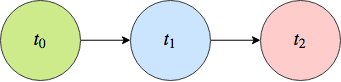

Edellisessä graafissa **välittömät** suunnatut riippuvuudet ovat $(t_0,t_1)$ ja $(t_1,t_2)$. Vaikka $t_2$ riippuukin välillisesti muuttujasta $t_0$, vain välittömät riippuvuudet mallinetaan. Näiden muuttujien todennäköisyys voidaan ilmaista paikallisen ehdollisen todennäköisyysjakauman (*local conditional probability distributions*) kaavalla 

$$p(t_0,t_1,t_2)=p(t_0)p(t_1 \mid t_0)p(t_2 \mid t_1).$$

Tällöin jokainen todennäköisyys mallinnetaan ikäänkuin omaan taulukkoonsa.


Menetelmän tehokkuus tulee ilmi, kun jokaiselle graafin osalle sallitaan 100 mahdollista arvoa. Mikäli mallinnettaisiin kaikkien mahdollisten konfiguraatioiden todennäköisyys, olisi mallinnettavana noin $100^3 = 1000000$ eri konfiguraatiota. Kaikkien mahdollisten sijasta vain välittömiä yhteyksiä käyttäen mahdollisten konfiguraatioiden määrä putoaa noin $100 + 100^2 + 100^2 = 20100$ konfiguraatioon, eli vain kahteen prosenttiin alkuperäisestä konfiguraatioiden määrästä. Kunhan jokaisella mallinnettavalla muuttujalla on rajattu määrä edeltäviä solmuja eli vanhempia, on välittömien yhteyksien mallintaminen huomattavasti kaikkien yhteyksien mallintamista tehokkaampaa.

#### Undirected Models

Suunnattujen graafien lisäksi rakenteellisiä todennäköisyyksiä voidaan ilmaista myös suuntaamattomien (*undirected*) graafien avulla. Niistä käytetään nimityksiä Markovin satunnaiskentät (*Markov random fields*) tai verkot (*Markov networks*). Suuntamattomat graafit ovat käyttäökelpoisia mallinnustehtävissä, joissa muuttujien suhteissa ei ole selkeää kausaalisuutta. Näin on esimerkiksi sairastumisen todennäköisyyden mallintamisessa, jossa kunkin henkilön terveydentilan kehittyminen on suhteellista muihin henkilöihin ja yhteydet ovat molemminsuuntaisia.

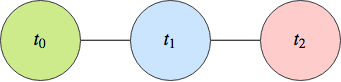

Suuntamaamattomat graafit muodostavat kaarien kautta yhteydessä olevien solmujen aligraafeja, joita kutsutaan klikeiksi (*clique*) ja merkitään tässä kohdin muuttujalla $C$. Klikeille voidaan laskea oma klikkipotentiaali (*clique potential*) $\Phi(C)$, joilla ilmaistaan klikin solmujen keskinäisen vuorovaikutuksen vahvuussuhdetta. Muuttujat $t_0$ ja $t_1$ muodostavat oman klikkinsä, $t_1$ ja $t_2$ omansa. Graafin arvot on myös rajattava ei-negatiivisiksi, jolloinka muuttujilla voidaan laskea normalisoimaton (*unnormalized*) todennäköisyysjakauma 

$$\tilde(p)(x)=\Pi_C \Phi(C)$$

kunkin klikin potentiaalin mukaisesti.



#### The Partition Function

Normalisoimaton jakauma ei kuitenkaan ole kunnollinen, sillä sen integroitavuudesta ei ole takeita. Normalisoimattomasta jakaumasta saadaan käyttökelpoinen todennäköisyysjakauma siten, että 

$$ p(x) = \frac{1}{Z}\tilde{p}(x) = \frac{1}{\int{\tilde{p}(x)d(x)}}\tilde{p}(x). $$

Normalisoivana muuttujana käytetty $Z$ tunnetaan ositusfunktiona (*partition function*) ja juontaa juurensa tilastolliseen fysiikkaan. Mikäli klikkipotentiaalifunktiot ovat vakioita, on $Z$ myös vakio. Mikäli ne taas ovat parametrisia, on $Z$ silloin näiden parametrien funktio.

Ositusfunktio $Z$ on integraali syötteen $x$ yli ja siksi usein haastava laskettava. Ohjaamattoman mallin on siksi oltava etenkin $Z$:n laskentaa edistävästi suunniteltu sekä topologiansa että arvojensa osalta. Siitäkin huolimatta useimmiten turvaudutaan likiarvoihin. Arvoista riippuen on jopa mahdollista, että ositusfunktiota ei voida edes laskea - näin on esimerkiksi jatkuvien arvojen tapauksessa.

Suunnattujen ja suuntaamattomien todennäköisyysgraafien merkittävin ero on, että suunnattujen graafien todennäköisyydet ovat paljon selkeämmin laskettavia. Suuntaamattomien graafien osalta todennäköisyydet määrittyvät klikkipotentiaalien kautta. Klikkipotentiaaleissa on vielä erikseen huomioitava, että kunkin klikin tiedon osa-alue vaikuttaa sen muuttujien suhteisiin, jolloin klikkipotentiaalin muodostaminen on riippuvaista kunkin klikin tuntemuksesta.

#### Energy-Based Models

Suuntaamattomien mallien pohjaoletuksena on, että yksikään mallin muuttujien arvoista ei saa olla nollaa pienempi. Tätä oletusta voidaan vahvistaa käyttämällä energiapohjaista mallia (*energy-based model*), jolloin normalisoimaton todennäköisyys

$$\tilde{p}(x) = \exp(-E(x)), $$

jossa $E(x)$ on energiafunktio ja $\exp$ takaa tuloksen positiivisuuden. Koska energiafunktio voidaan valita vapaasti, saadaan mallin koulutustakin helpotettua. Mallit, jotka hyödyntävät ylläolevaa funktiota, tunnetaan kokoavasti nimellä Boltzmannin koneet (*Boltzmann machines*) ja itse jakauma tunnetaan Boltzmannin jakaumana. Nykyisin erottava tekijä Boltzmannin koneiden ja Markovin kenttien välillä on piilomuuttujien olemassaolo - ensimmäisissä niitä on.

Ohjaamattomien graafien klikit vastaavat normalisoimattoman todennäköisyysjakauman muuttujia. Tällöin ne myös ovat vastaavien energiafunktioiden muuttujia, sillä $\exp(a)\exp(b)=\exp(a+b)$. Tällöin klikit voidaan ilmaista $\Phi_{a,b}(a,b)$ sijasta muodossa $E_{a,b}(a,b)$ energiafunktion avulla. Usean merkintävätavan joukosta kirjassa käsitellään energiafunktioita hyödyntäviä todennäköisyysmalleja merkinnällä $\tilde{p}_{model}(x)$.

#### Separation and D-Separation

Graafimallien kaaret kertovat muuttujien välisistä suorista vuorovaikutussuhteista. Näin voidaan päästä käsiksi myös epäsuoriin yhteyksiin, joiden avulla voidaan edelleen selvittää eri muuttujien joukkojen ehdollisia riippuvuussuhteita. Suuntaamattomissa graafeissa tämä tehdään erottelulla (*separation*) eri muuttujien joukkojen välillä. 

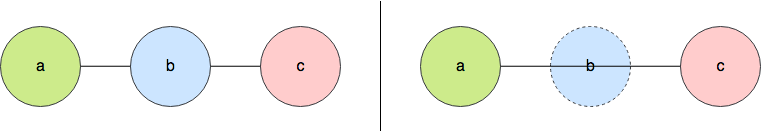

Kaksi joukkoa ovat riippumattomia, kun niiden välillä joko ei ole yhteyttä tai yhteys kulkee todennettavasti jonkin kolmannen joukon kautta (*vasen kuva*). Jos tätä kolmatta joukkoa ei voida todentaa ja yhteys kahden joukon kuitenkin on, ei joukkoja voida käsitellä erottuvina (*oikea kuva*). Suunnatuissa graafeissa puhutaan d-erottelusta (*d-separation*), jossa d ilmaisee riippuvuutta (*dependence*). Erottuvuus kertoo silti vain graafista johdettavissa olevasta ehdollisesta riippumattomuudesta, eivätkä graafit aina onnistu riippumattomuuksien mallinnuksessa.

#### Converting between Undirected and Directed Graphs

Koneoppimismnetelmistä puhutaan usein joko ohjattuina tai ohjaamattomina (*ohjattu = directed = suunnattu*), mutta tämä johtaa harhaan todennäköisyysmallien kohdalla. Niiden kohdalla on parempi puhua kuvailevuudesta (*description*). Suunnatun tai suuntaamattoman graafin valinta riippuu jälleen mallinnettavasta kohteesta ja siitä, miten hyvin kumpikin malli kykenee kuvailemaan dataa.

Käyttämällä suunnattua graafia on datantuottoprosessin mukaisten näytteiden tuottaminen suoraviivaista. Suuntaamattomat graafit taas kykenevät paremmin tavoittamaan mallinnettavan asian piilevän tilan tai itse prosessin. Graafien käyttö on ylipäätään paikallaan, kun halutaan mallintaa laajojen muuttujamäärien välisiä yhteyksiä tehokkaasti etenkin suorien yhteyksien välityksellä.Graafia valittaessa pyritään siihen, että kyetään kuvaamaan niin monta piilevää riippumattomuutta kuin mahdollista ilman valheellisia riippumattomuuksia. 

Suunnatut graafit kykenevät tavoittamaan esimerkiksi tavoittamaan kahden muutoin täysin toisiinsa liittymättömän muuttujan $a$ ja $b$ yhteisvaikutuksesta syntyvän muuttujan $c$ (*immorality*). Muuntamalla tällainen suunnattu graafi suuntaamaattomaksi, saadaan nämä vanhemmat vastuuseen teoistaan (*moralized graph*). Suuntamattomat graafit vuorostaan kykenevät tavoittamaan kehällisiä riippuvuuksia (*loop*). Samoin suuntaamattomia graafeja voidaan muuntaa suunnatuiksi.

#### Factor Graphs

Osatekijägraafit (*factor graph*) ovat suuntaamattomien graafien kehitelmä klikkien monitulkintaisuuden osalta. Vaikka klikille laskettaisiin klikkipotentiaali, ei aina ole varmuutta siitä, että potentiaali edes koskee koko klikkiä. Tällöin graafi voidaan piirtää käyttäen kahta eri symbolia (*bipartite*) siten, että ympyrä vastaa perinteisen suuntaamattoman graafin muuttujaa ja neliö klikin tunnuslukua tai osatekijää. Suuntamattomat yhteydet muodostetaan sitten vain yksittäisten muuttujien ja klikkien osatekijöiden välillä.

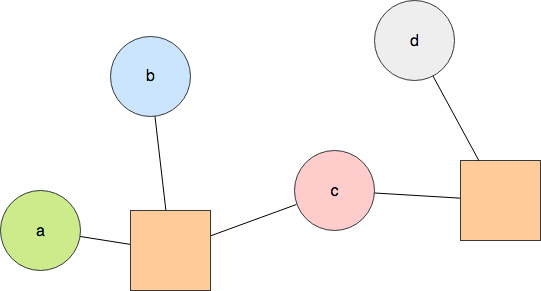

Näin muuttujat rymitellään klikeiksi sen mukaan, mihin osatekijään ne yhdistyvät.

### 16.3 Sampling from Graphical Models

Suunnattujen graafien osalta yksinkertaisella ja tehokkaalla edeltäviin todennäköisyyksiin (*ancestral*) pohjaavalla näytteistyksellä saadaan tuotettua datantuottoprosessin mukaisia näytteitä. Tällöin graafi on järjestetty siten, että eniten jälkeläisiä omaavat solmut ovat toisessa ja vain lapsina toimivat solmut toisessa laidassa. Edettäessä kohti lapsisolmuja tulee datantuottoprosessin mukainen ehdollinen yhteistodennäköisyysjakauma laskettua kuin itsestään. 

Sitä voidaan käyttää kuitenkin vain suunnattujen graafien kanssa. Samoin se edellyttää, että kaikki paikalliset ehdolliset todennäköisyydet on laskettavissa edettäessä eniten jälkeläisiä omaavista solmuista kohti jälkeläisettömiä solmuja. Suuntaamattomien graafien kohdalla ne on ensin muunnettava suunnatuiksi, mikäli tätä menetelmää tahdotaan hyödyntää, joskaan ongelmatonta se ei silti ole

### 16.4 Advantages of Structured Modeling

Kuten todettua, suorien muuttujien välisten riippuvuuksien mallintaminen tehostaa laskentaa huomattavasti. Näin on sekä mallin kouluttamisen että koulutetun mallin avulla tehdyn näytteistyksen kohdalla. Ks. aliluku 16.1, mitäpä sitä turhaan itseään toistamaan. Todetun lisäksi yksi hyöty on helpompi tulkittavuus, kun muuttujien väliset riippuvuudet ovat suoraan tulkittavissa. Näin mallin lisäksi myös ihminen voi hyötyä merkittävästi mallien käytöstä ja koulutetun mallin tutkimisesta.

### 16.5 Learning about Dependencies

Generatiivinen malli on hyvä, kun se tavoittaa havaittujen muuttujien välisen todennäköisyysjakauman, mikä onnistuu tehokkaimmin piilomuuttujia käyttämällä. Aiheeseen ytimekkäästi liittyvä koneoppimisen osa-alue on rakenteiden oppiminen (*structure learning*) ja se keskittyy etenkin piilomuuttujia sisältämättömien graafimaisten mallien käyttöön. Käytetyt algoritmit ovat usein ahneuteen pohjaavia (*greedy*). Algoritmit kokeilevat monia graafien kokoonpanoja palkiten hyvästä suorituskyvystä ja sakottaen kompleksisuudesta. 

Käyttämällä piilomuuttujia poistuu tarve eri kokoonpanojen mekaaniseen kokeilemiseen. Tällöin malli on sellaisenaan suoraan kouluettavissa. Kuten tähän mennessä on ehditty jo paljon siitä puhumaankin, piilomuttujat auttavat datantuottprosessin tavoittamisessa.

### 16.6 Inference and Approximate Inference

Piilomuuttujia sisältävässä mallissa tavoitteena on löytää ne piilomuuttujat, jotka kuvailevat havaittuja muuttujia. Tällöin malleja voidaan kouluttaa esimerkiksi käyttämällä sopivaa virhefunktiota. Graafimaisten syvien mallien kouluttaminen ei kuitenkaan ole ongelmatonta, sillä syväoppivien mallien graafit eivät ole riittävän rajoitettuja. Useimmat käytännön elämän graafimaisesti ratkaistava olevat ongelmat ovat NP-vaikeita, mikä edelleen hankaloittaa graafin oppimista. 

Siksi likiarvoinen oppiminen on lähestymistavoista toimivin ja käytetty etenkin syväoppivien menetelmien kohdalla. Tavoitteena on etsiä datantuottoprosessia likimääräisesti niin lähellä oleva jakauma, kuin vain mahdollista.

### 16.7 The Deep Learning Approach to Structured Probabilistic Models

Koneoppimisen työkalut ovat samat sekä syvien että perinteisten graafimaisten rakenteellisten todennäköisyysmallien kanssa. Ero on työkalujen yhdistämis- ja käyttötavoissa. Syvien mallien syvyys määritellään laskentagraafin sijasta graafin syvyyden eli tarvittavien askelten mukaan. Kuten yleensäkin, syvät mallit hyödyntävät jaettuja kuvauksia ja piilokerroksia, kun taas perinteiset graafimallit käyttävät usein vain havaittuja muuttujia.

Piilomuuttujien suunnittelutavat myös eroavat syvien ja perinteisten graafimallien välillä. Ennalta asettamisen sijasta mallin annetaan oppia piilomuuttujien arvot koulutuksen myötä, jolloin arvot eivät välttämättä saa mitään ihmiselle helposti tulkittavia muotoja. Kuten myös jo opittua, syvät mallit ovat hyvin vahvasti kytkettyjä kerrosten välisesti, kun taas perinteiset mallit ovat vain löyhästi kytkettyjä.

Graafimallien näkökulmasta syvien mallien hajautetut kuvaukset tuottavat harvoja graafeja, joihin perinteisten graafien inferenssimenetelmät eivät sellaisinaan toimi. Siksi syvät mallit suunnitellaan olemaan tehokkaita Gibbsin näytteistyksessä tai vaihtelevuuteen pohjaavien algoritmien kanssa. Syväoppivien menetelmien käyttöä leimaa tietyntasoinen toleranssi tuntematonta kohtaan, jolloin täydellisen mallintamisen sijasta mallien kapasiteettia kasvatetaan aina mielekkään koulutuksen rajalle asti.

#### Example: The Restricted Boltzmann Machine

Rajoitettu Boltzmannin kone (*restricted Boltzmann machine, RBM*) on tyyppiesimerkki graafisesta syväoppivasta mallista. Se ei ole itsessään malli, vaan tapa kouluttaa piilomuuttujia. Se koostuu sekä näkyvistä että piilotetuista yksiköistä. Kaikki näkyvät yksiköt ovat yhteydessä kaikkiin piiloyksikköihin, mutta eivät keskenään - tästä juontaa termi rajoitettu. Tavoitteena oppia mallintamaan datantuottoprosessia.

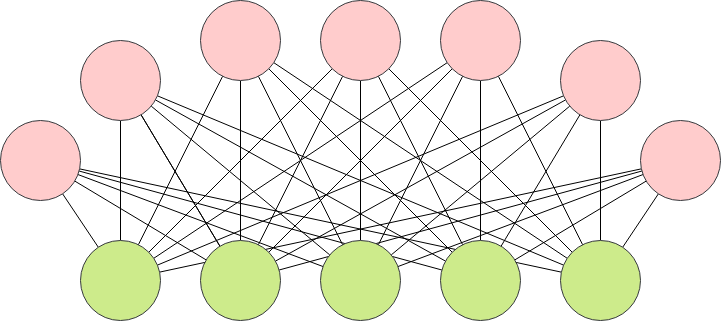

Mallin käyttöä ja toimintaa esitellään tarkemmin luvussa 18, mutta alustavasti voidaan todeta sen olevan erityisen tehokas Gibbsin näytteistyksessä.